<a href="https://colab.research.google.com/github/shaunaliu-github/random-personal-codes/blob/main/Computing%20Model%20of%20Carbon%20Cycle%20and%20Population%20Dynamics%20in%20a%20Simple%20Aquatic%20Ecosystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Main Function

In [ ]:
import numpy as np

def functionn(n_algae, n_fish, n_zoo, volume):

    resp_zoo = 0.732e-4 #mol CO2 / L day

    #n_algae = 1e-3 * float(input('How many mL of algae?')) #L

    #n_fish = float(input('How many fishes?'))

    #n_zoo = 1e-3 * float(input('How many mL of zooplankton?')) #L

    fish_eat_algae_rate = 0.08  # L/day
    zoo_eat_algae_rate = 0.385173669 #L/L
    #fish_eat_zoo_rate = 1 #!!!!!

    photo_rate = 0.00643 * n_algae #mol/day

    resp_fish = 3.54e-4
    resp_algae = 6.43e-3

    o2_lvl=10e-3 * volume
    o2_lethal_lvl_fish = 8.8e-4
    n_algae_production_rate = 1.2 # pop growth per unit time (from a graph)

    zoo_reproduction_rate = 1.1569


    go_on = True

    def food_chain(days, n_algae, n_fish, n_zoo):
        if n_zoo >= 0.1:
            n_zoo -= n_fish * 0.249 * 0.001 * 30 #zoo_consumed in ml
            #sorry had to assume zooplankton density is water
            n_algae = n_algae * n_algae_production_rate
            n_algae -= n_zoo * zoo_eat_algae_rate
            n_zoo = n_zoo * zoo_reproduction_rate


        else:
            n_algae = n_algae - n_fish * fish_eat_algae_rate #- n_zoo * fish_eat_zoo_rate
            n_algae = n_algae * n_algae_production_rate
            n_zoo = n_zoo * zoo_reproduction_rate
        return n_algae, n_zoo, n_fish

    #endings
    def pop_check(n_algae, n_fish, o2_lvl, go_on):
        if o2_lvl < o2_lethal_lvl_fish:  # ppm

            #print('lethal oxygen levels for fish')
            n_fish = 0
            go_on = False

        if n_algae <= 0:
            #print('no algae left')
            go_on = False

        if n_algae >= 1000:
            #print('death by eutrophication')
            go_on = False


        return go_on

    #def biomass_transfer(days, n_algae, n_fish):


    def o2_per_day_update(days, n_algae, n_fish):
        global o2_lvl
        half_full = 0.5*volume
        if n_algae <= half_full:
            o2_lvl = float (photo_rate * n_algae - resp_fish * n_fish - resp_algae * n_algae - resp_zoo * n_zoo)
        if n_algae > half_full:
            #print('tank half full with algae. eutrophication?')
            o2_lvl = float (photo_rate * 5 - resp_fish * n_fish - resp_algae * n_algae - resp_zoo * n_zoo)
        return o2_lvl

    days = 0


    while go_on==True and days <= 500:
        days += 1
        o2_lvl = o2_per_day_update(days, n_algae, n_fish)
        n_algae, n_zoo, n_fish = food_chain(days, n_algae, n_fish, n_zoo)
        go_on = pop_check(n_algae, n_fish, o2_lvl, go_on)

    final_day = days
    #print('final_day', final_day)
    return final_day

# Volume vs time

In [ ]:
lst_fish = []
lst_algae = []
lst_zoo = []
lst_day =[]
lst_volume =[]
lst_day=[]
lst_maxday=[]
lst_vday=[]
lst_maxfish=[]
lst_maxalgae=[]
lst_maxzoo=[]

for volume in range(50):
    for n_fish in range(0,20):
        for n_algae in np.linspace(0, 0.7*volume, num=10):
            for n_zoo in np.linspace(0,0.5*volume, num=10):
                final_day = functionn(n_fish, n_algae, n_zoo, volume)
                lst_fish.append(n_fish)
                lst_algae.append(n_algae)
                lst_zoo.append(n_zoo)
                lst_day.append(final_day)
    lst_volume.append(volume)
    lst_vday.append(max(lst_day))


<ipython-input-93-bf7f8c8a4c13>:16: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a, _, _, _ = np.linalg.lstsq(x, y)


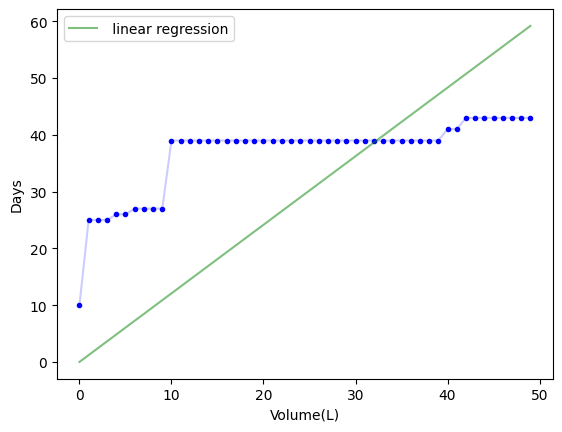

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = np.array(lst_volume)
y = np.array(lst_vday)



plt.xlabel( 'Volume(L)' )
plt.ylabel( 'Days' )
#ax.set_zlabel( 'algae' )
#ax.set_zlim(0, 25)

x = x[:,np.newaxis]
a, _, _, _ = np.linalg.lstsq(x, y)

plt.plot(x, y, 'b.')
plt.plot(x, y, color='blue', markersize=1, alpha = 0.2)
plt.plot(x, a*x, 'g-', label=' linear regression', alpha = 0.5)
plt.legend()
plt.show()


# Driver + Pop plots


In [ ]:
lst_fish = []
lst_algae = []
lst_zoo = []
lst_day =[]
lst_volume =[]
lst_day=[]
lst_maxday=[]
lst_maxfish=[]
lst_maxalgae=[]
lst_maxzoo=[]

volume = 500
for n_fish in range(0,50):
    for n_algae in np.linspace(0, 0.7*volume, num=10):
        for n_zoo in np.linspace(0,0.5*volume, num=10):
            final_day = functionn(n_fish, n_algae, n_zoo, volume)
            lst_fish.append(n_fish)
            lst_algae.append(n_algae)
            lst_zoo.append(n_zoo)
            lst_day.append(final_day)


In [ ]:
maxfish=[]
maxday=[]
maxalgae=[]
maxzoo=[]
for i in range(len(lst_day)-1):
    if lst_day[i]>=40:
        maxfish.append(lst_fish[i])
        maxday.append(lst_day[i])
        maxalgae.append(lst_algae[i])
        maxzoo.append(lst_zoo[i])

print(len(maxday), maxday[46], maxfish[46], maxalgae[46], maxzoo[46])

IndexError: list index out of range

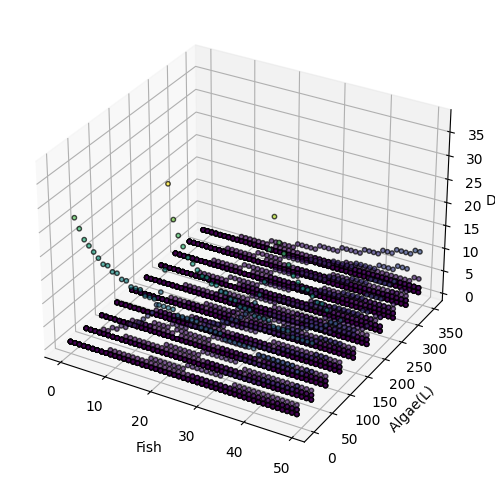

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = lst_fish
y = lst_algae
z = lst_day

fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel( 'Fish' )
ax.set_ylabel( 'Algae(L) ' )
ax.set_zlabel( 'Days' )
#ax.set_zlim(0, 25)

ax.scatter(x, y, z,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 10,
           c=lst_day,
           cmap='viridis')

plt.show()

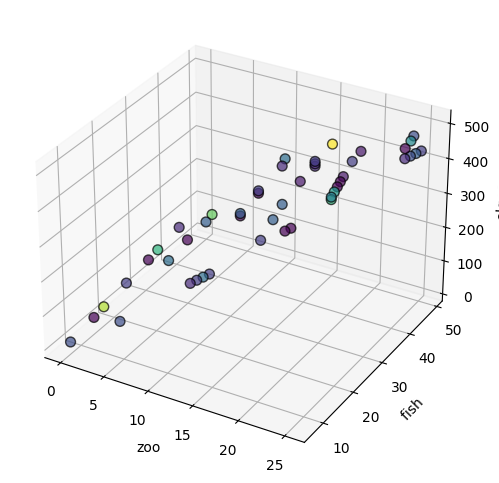

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = maxzoo
y = maxfish
z = maxalgae

fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel( 'zoo' )
ax.set_ylabel( 'fish ' )
ax.set_zlabel( 'algae' )
#ax.set_zlim(0, 25)

ax.scatter(x, y, z,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 50,
           c=maxday, cmap='viridis')

plt.show()


# fake votka

In [ ]:

volume = 1000

n_algae = 381.8181818181818

n_fish = 49 ###mass is 49*0.249 * 0.001 is 0.012201kg

n_zoo = 15.15151515151515 #L


def functionnnn1(n_algae, n_fish, n_zoo, days):
    resp_zoo = 0.732e-4 #mol CO2 / L day

    fish_eat_algae_rate = 0.08  # L/day
    zoo_eat_algae_rate = 0.385173669 #L/L

    photo_rate = 0.00643 * n_algae #mol/day

    resp_fish = 3.54e-4
    resp_algae = 6.43e-3

    o2_lvl=10e-3 * volume
    o2_lethal_lvl_fish = 8.8e-4
    n_algae_production_rate = 1.2 # pop growth per unit time (from a graph)

    zoo_reproduction_rate = 1.1569


    go_on = True

    def food_chain(days, n_algae, n_fish, n_zoo):
        if n_zoo >= 0.1:
            n_zoo -= n_fish * 0.249 * 0.001 * 30 #zoo_consumed in ml
            #sorry had to assume zooplankton density is water
            n_algae = n_algae * n_algae_production_rate
            n_algae -= n_zoo * zoo_eat_algae_rate
            n_zoo = n_zoo * zoo_reproduction_rate


        else:
            n_algae = n_algae - n_fish * fish_eat_algae_rate #- n_zoo * fish_eat_zoo_rate
            n_algae = n_algae * n_algae_production_rate
            n_zoo = n_zoo * zoo_reproduction_rate
        return n_algae, n_zoo, n_fish

    #endings
    def pop_check(n_algae, n_fish, o2_lvl, go_on):
        if o2_lvl < o2_lethal_lvl_fish:  # ppm

            #print('lethal oxygen levels for fish')
            n_fish = 0
            go_on = False

        if n_algae <= 0:
            #print('no algae left')
            go_on = False

        if n_algae >= 1000:
            #print('death by eutrophication')
            go_on = False


        return go_on

    def o2_per_day_update(days, n_algae, n_fish):
        global o2_lvl
        half_full = 0.5*volume
        if n_algae <= half_full:
            o2_lvl = float (photo_rate * n_algae - resp_fish * n_fish - resp_algae * n_algae - resp_zoo * n_zoo)
        if n_algae > half_full:
            #print('tank half full with algae. eutrophication?')
            o2_lvl = float (photo_rate * 5 - resp_fish * n_fish - resp_algae * n_algae - resp_zoo * n_zoo)

        return o2_lvl, n_algae, n_fish, n_zoo


    n_algae, n_zoo, n_fish = food_chain(days, n_algae, n_fish, n_zoo)
    go_on = pop_check(n_algae, n_fish, o2_lvl, go_on)
    o2_lvl, n_algae, n_fish, n_zoo = o2_per_day_update(days, n_algae, n_fish)
    return go_on, n_algae, n_fish, n_zoo, o2_lvl


days = 0

dayday=[]
dayfish=[]
dayalgae=[]
dayzoo=[]

while go_on==True and days <= 500:
    go_on, n_algae, n_fish, n_zoo, o2_lvl = functionnnn1(n_algae, n_fish, n_zoo, days)
    dayday.append(days)
    dayfish.append(n_fish)
    dayalgae.append(n_algae)
    dayzoo.append(n_zoo)
    days+=1

final_day = days -1
print(dayday)

6


6


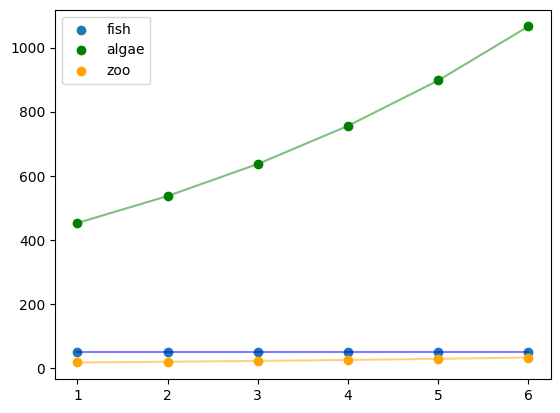

In [ ]:
import matplotlib.pyplot as plt
print(final_day)
plt.scatter(dayday, dayfish, label='fish')
plt.plot(dayday, dayfish, alpha=0.5, c='blue')
plt.scatter(dayday, dayalgae, label='algae', c='green')
plt.plot(dayday, dayalgae, alpha=0.5, c='green')
plt.scatter(dayday, dayzoo, label='zoo', c='orange')
plt.plot(dayday, dayzoo, alpha=0.5, c='orange')
plt.legend()
plt.show()


#Violin Plot

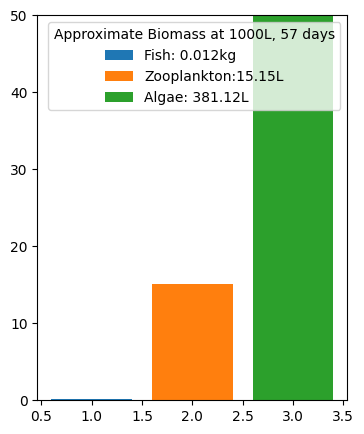

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


x = [1, 2, 3]
data = [0.12, 15.15, 381.12]

fig, ax = plt.subplots(figsize=(4, 5))
ax.set_ylim(0,50)
bar_labels = ['Fish: 0.012kg', 'Zooplankton:15.15L', 'Algae: 381.12L']
bar_colors = ['tab:blue', 'tab:orange','tab:green',]

ax.bar(x, data, label=bar_labels, color=bar_colors)
ax.legend(title='Approximate Biomass at 1000L, 57 days')